In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic
from scipy.interpolate import interp1d

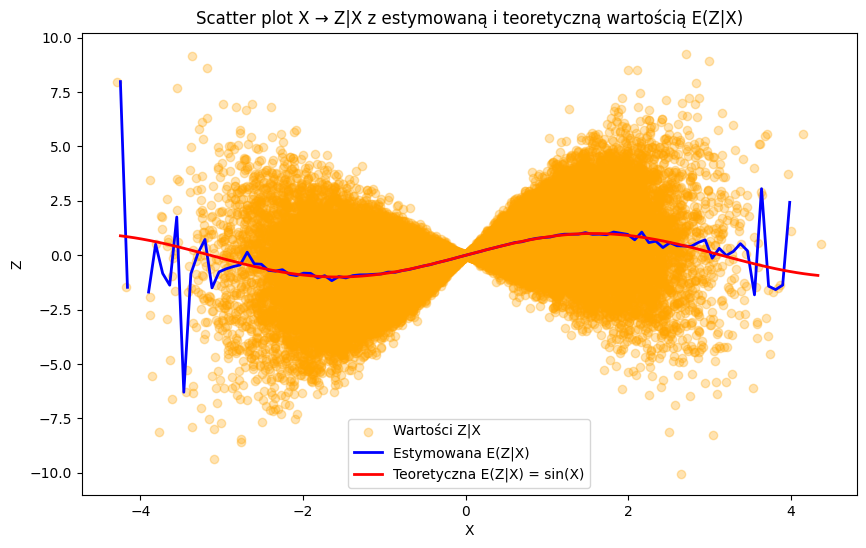

In [74]:
def plot_conditional_expectation(
    num_samples: int = 100000, num_bins: int = 100
) -> None:
    """
    Rysuje warunkową wartość oczekiwaną E(Z|X) przy użyciu losowych próbek X i Y, gdzie Z = X * Y + sin(X).
    Porównuje estymowaną E(Z|X) z teoretyczną wartością sin(X).

    Parametry:
    num_samples (int): Liczba losowych próbek do wygenerowania dla X i Y.
    num_bins (int): Liczba przedziałów do użycia przy estymacji E(Z|X).

    Zwraca:
    None

    Przykład użycia:
    plot_conditional_expectation(num_samples=100000, num_bins=100)
    """

    # Generowanie losowych próbek dla X i Y
    X = np.random.standard_normal(num_samples)
    Y = np.random.standard_normal(num_samples)

    # Obliczanie Z na podstawie wzoru Z = X * Y + sin(X)
    Z = X * Y + np.sin(X)

    # Obliczanie warunkowej wartości oczekiwanej E(Z|X) w przedziałach (bins)
    # 'binned_statistic' dzieli dane X na przedziały i oblicza średnią Z w każdym przedziale
    bin_means, bin_edges, _ = binned_statistic(X, Z, statistic="mean", bins=num_bins)

    # Obliczanie środków przedziałów
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Teoretyczna wartość E(Z|X) = sin(X) w środkach przedziałów
    E_Z_given_X_theoretical = np.sin(bin_centers)

    # Tworzenie scatterplota X -> Z|X
    plt.figure(figsize=(10, 6))  # Ustawienie rozmiaru wykresu
    plt.scatter(
        X, Z, alpha=0.3, label="Wartości Z|X", color="orange"
    )  # Rysowanie punktów (X, Z)
    plt.plot(
        bin_centers, bin_means, "b-", label="Estymowana E(Z|X)", linewidth=2
    )  # Rysowanie estymowanej E(Z|X)
    plt.plot(
        bin_centers,
        E_Z_given_X_theoretical,
        "r-",
        label="Teoretyczna E(Z|X) = sin(X)",
        linewidth=2,
    )  # Rysowanie teoretycznej E(Z|X)
    plt.xlabel("X")  # Etykieta osi X
    plt.ylabel("Z")  # Etykieta osi Y
    plt.title(
        "Scatter plot X → Z|X z estymowaną i teoretyczną wartością E(Z|X)"
    )  # Tytuł wykresu
    plt.legend()  # Dodanie legendy
    plt.show()  # Wyświetlenie wykresu


plot_conditional_expectation()


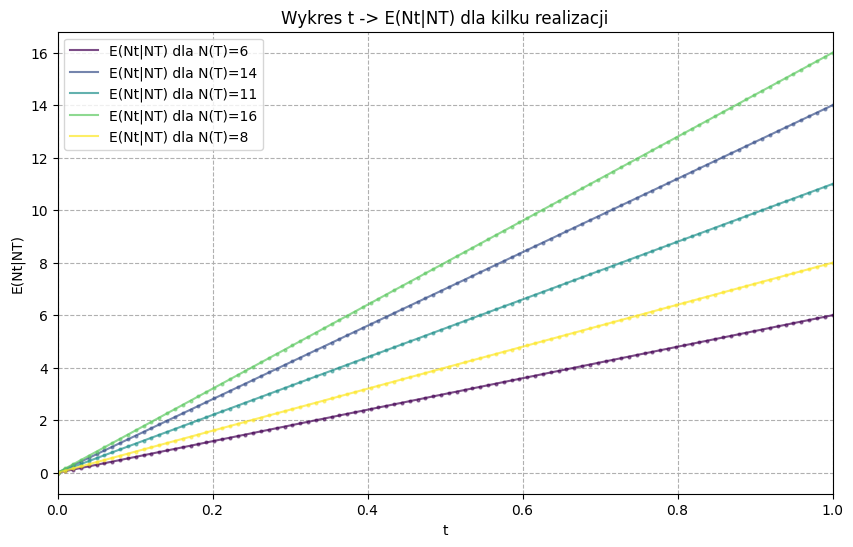

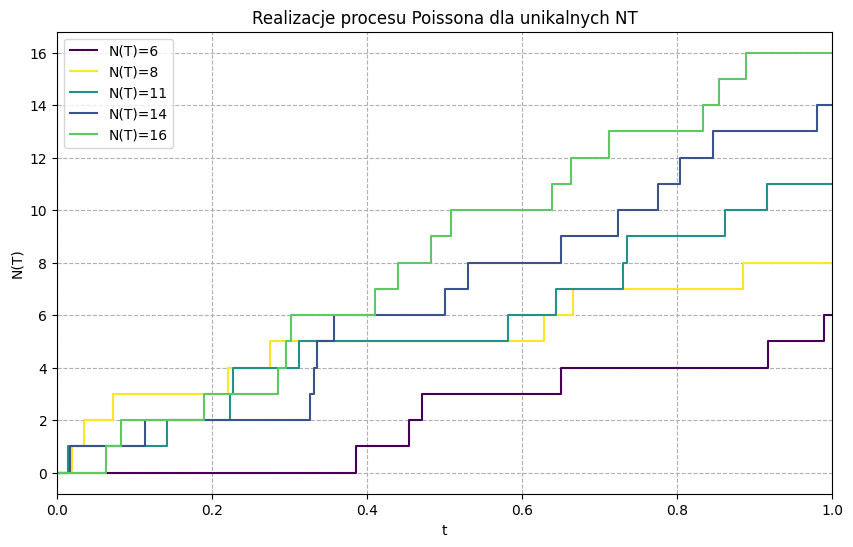

In [75]:
def plot_E_Nt_given_NT(
    T: float = 1,
    lambda_intensity: float = 10,
    num_realizations: int = 5,
    line_style: str = "solid",
) -> None:
    """
    Rysuje wartość oczekiwaną E(Nt|NT) dla procesu Poissona o intensywności λ oraz indywidualne realizacje tego procesu.

    Parametry:
    T (float): Całkowity okres czasu dla procesu Poissona.
    lambda_intensity (float): Intensywność (tempo) procesu Poissona.
    num_realizations (int): Liczba różnych realizacji procesu Poissona do narysowania.
    line_style (str): Styl linii dla wykresów ('solid' lub 'dashed').

    Zwraca:
    None

    Przykład użycia:
    plot_E_Nt_given_NT(T=1, lambda_intensity=10, num_realizations=5, line_style='solid')
    """

    # Generowanie wartości czasu od 0 do T
    t_values = np.linspace(0, T, 100)
    # Generowanie palety kolorów dla różnych realizacji
    colors = plt.cm.viridis(np.linspace(0, 1, num_realizations))

    # Zbiór do przechowywania unikalnych próbek NT
    NT_samples = set()

    # Inicjalizacja wykresu
    plt.figure(figsize=(10, 6))
    color_map = {}

    # Pętla dla każdej realizacji
    for i in range(num_realizations):
        # Generowanie unikalnej próbki z rozkładu Poissona dla NT
        NT_sample = np.random.poisson(lambda_intensity * T)
        while NT_sample in NT_samples:
            NT_sample = np.random.poisson(lambda_intensity * T)
        NT_samples.add(NT_sample)

        color_map[NT_sample] = colors[i]

        # Obliczanie wartości oczekiwanej E(Nt|NT)
        E_Nt_given_NT_sample = (t_values * NT_sample) / T
        color = color_map[NT_sample]

        # Rysowanie wykresu wartości oczekiwanej E(Nt|NT)
        plt.plot(
            t_values,
            E_Nt_given_NT_sample,
            linestyle=line_style,
            alpha=0.7,
            color=color,
            label=f"E(Nt|NT) dla N(T)={NT_sample}",
        )
        plt.plot(
            t_values, E_Nt_given_NT_sample, "o", markersize=2, alpha=0.5, color=color
        )

    # Ustawienia wykresu
    plt.xlabel("t")
    plt.ylabel("E(Nt|NT)")
    plt.xlim(0, T)
    plt.title("Wykres t -> E(Nt|NT) dla kilku realizacji")
    plt.grid(True, linestyle="--")
    plt.legend(loc="upper left")
    plt.show()

    # Inicjalizacja wykresu dla realizacji procesu Poissona
    plt.figure(figsize=(10, 6))
    for NT_sample in NT_samples:
        # Generowanie czasów zdarzeń i odpowiadających im liczby zdarzeń
        t_realization = np.append(0, np.sort(np.random.uniform(0, T, NT_sample)))
        Nt_realization = np.arange(0, NT_sample + 1)

        color = color_map[NT_sample]
        plt.step(
            np.append(t_realization, T),
            np.append(Nt_realization, NT_sample),
            where="post",
            label=f"N(T)={NT_sample}",
            color=color,
        )

    # Ustawienia wykresu dla realizacji procesu Poissona
    plt.xlabel("t")
    plt.ylabel("N(T)")
    plt.xlim(0, T)
    plt.title("Realizacje procesu Poissona dla unikalnych NT")
    plt.grid(True, linestyle="--")
    plt.legend(loc="upper left")
    plt.show()


# Wywołanie funkcji z parametrami domyślnymi
plot_E_Nt_given_NT(num_realizations=5, line_style="solid")


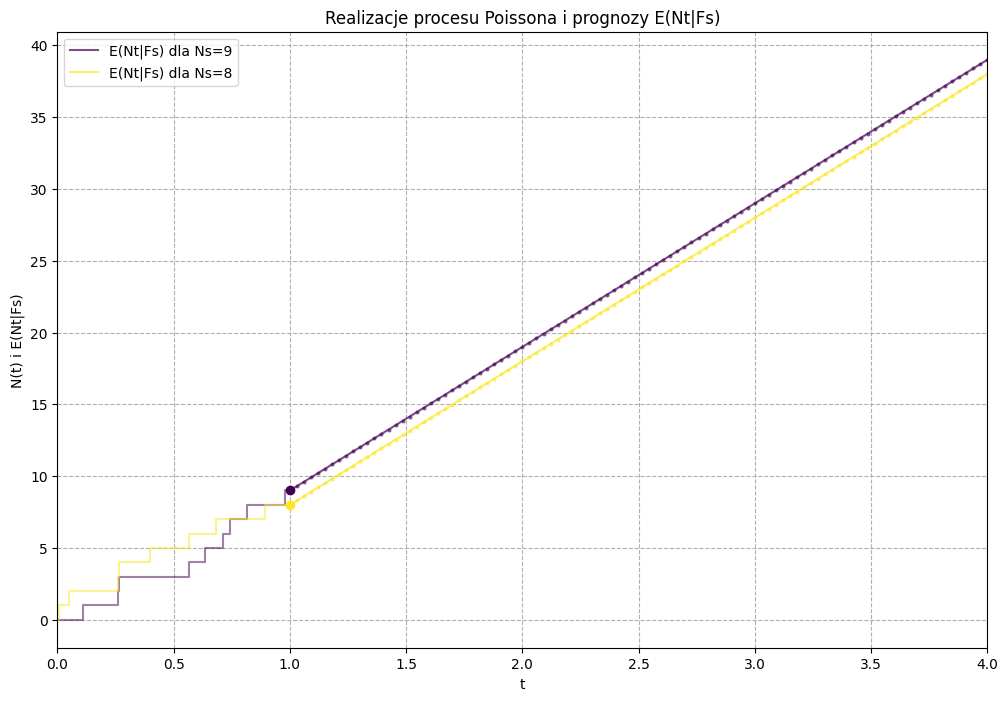

In [76]:
import numpy as np
import matplotlib.pyplot as plt


def plot_E_Nt_given_Fs_10_steps(
    s: float = 1, lambda_intensity: float = 10, num_realizations: int = 5, T: float = 4
) -> None:
    """
    Rysuje wartość oczekiwaną E(Nt|Fs) dla procesu Poissona o intensywności λ oraz indywidualne realizacje tego procesu.

    Parametry:
    s (float): Czas, w którym rozważana jest filtracja Fs.
    lambda_intensity (float): Intensywność (tempo) procesu Poissona.
    num_realizations (int): Liczba różnych realizacji procesu Poissona do narysowania.
    T (float): Całkowity okres czasu dla procesu Poissona.

    Zwraca:
    None

    Przykład użycia:
    plot_E_Nt_given_Fs_10_steps(s=1, lambda_intensity=10, num_realizations=5, T=4)
    """

    # Generowanie wartości czasu od s do T
    t_values = np.linspace(s, T, 100)
    # Generowanie palety kolorów dla różnych realizacji
    colors = plt.cm.viridis(np.linspace(0, 1, num_realizations))
    # Zbiór do przechowywania unikalnych próbek NT
    NT_samples = set()
    color_map = {}

    # Inicjalizacja wykresu
    plt.figure(figsize=(12, 8))

    # Pętla dla każdej realizacji
    for i in range(num_realizations):
        # Generowanie unikalnej próbki z rozkładu Poissona dla NT
        NT_sample = np.random.poisson(lambda_intensity * s)
        while NT_sample in NT_samples:
            NT_sample = np.random.poisson(lambda_intensity * s)
        NT_samples.add(NT_sample)

        # Generowanie czasów zdarzeń i odpowiadających im liczby zdarzeń do czasu s
        t_realization = np.append(0, np.sort(np.random.uniform(0, s, NT_sample)))
        Nt_realization = np.arange(0, NT_sample + 1)

        # Przypisanie koloru do aktualnej realizacji
        color = colors[i]
        color_map[NT_sample] = color

        # Obliczanie wartości oczekiwanej E(Nt|Fs)
        E_Nt_given_Fs = NT_sample + lambda_intensity * (t_values - s)

        # Rysowanie trajektorii do 10 kroków
        plt.step(
            np.append(t_realization, s),
            np.append(Nt_realization, NT_sample),
            where="post",
            alpha=0.5,
            color=color,
        )
        plt.scatter([s], [NT_sample], color=color, zorder=5)

        # Rysowanie prognozy
        plt.plot(
            t_values,
            E_Nt_given_Fs,
            linestyle="solid",
            alpha=0.7,
            color=color,
            label=f"E(Nt|Fs) dla Ns={NT_sample}",
        )
        plt.plot(t_values, E_Nt_given_Fs, "o", markersize=2, alpha=0.5, color=color)

    # Ustawienia wykresu
    plt.xlabel("t")
    plt.ylabel("N(t) i E(Nt|Fs)")
    plt.xlim(0, T)
    plt.title("Realizacje procesu Poissona i prognozy E(Nt|Fs)")
    plt.grid(True, linestyle="--")
    plt.legend(loc="upper left")
    plt.show()


# Wywołanie funkcji z parametrami domyślnymi
plot_E_Nt_given_Fs_10_steps(num_realizations=2, T=4)
